# 데이터 전처리 예제 1

* **데이터 설명**
  * 본 데이터는 A대학 도서관에서 제공하는 온라인 DB에 대한 사용자별 이용기록(Transaction)입니다.
  * user_id : 사용자ID
  * region : 지역코드
  * college : 단과대학코드
  * major : 전공코드
  * social_position : 직급코드
  * month : 이용월
  * weekday : 이용요일(1:일요일, 2:월요일, 3:화요일, 4:수요일, 5:목요일, 6:금요일, 7:토요일)
  * hour : 이용시각(24H)
  * DB : 이용 온라인 DB

### 0.0. 필요한 패키지를 로딩하세요

In [1]:
# 넘파이
# 판다스
import pandas as pd
import numpy as np


## 1. 데이터 로딩 및 문제 파악하기

### 1.1. 데이터를 로딩하고 처음 5개의 레코드를 출력하세요.

data_01 = pd.read_csv('DATA_01.csv')

In [32]:
data01 = pd.read_csv('../mentor_class/DATA_01/DATA_01.csv')

### 1.2. 변수별 데이터 타입을 알아볼 수는 코드를 제시하고 문제점이 있을 경우 서술하세요.

In [44]:
data01.info() # 여기저기 결측치가 있다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76806 entries, 0 to 76805
Data columns (total 9 columns):
user_id            76806 non-null object
region             76806 non-null object
college            76806 non-null object
major              76806 non-null object
social_position    76806 non-null object
month              75772 non-null float64
weekday            76806 non-null int64
hour               76806 non-null int64
DB                 76805 non-null object
dtypes: float64(1), int64(2), object(6)
memory usage: 5.3+ MB


### 1.3. 수치형 변수의 요약 통계량을 제시하세요.

In [17]:
# describe() 활용
data01.describe()

,month,weekday,hour
count,75772.000000,76806.000000,76806.000000
mean,6.592831,3.846614,13.719748
std,3.339591,1.863474,6.742292
min,1.000000,1.000000,0.000000
25%,4.000000,2.000000,10.000000
50%,6.000000,4.000000,14.000000
75%,10.000000,5.000000,19.000000
max,12.000000,7.000000,30.000000


### 1.4. 범주형 변수의 요약 통계량을 제시하세요.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000AB015C0>,
      dtype=object)

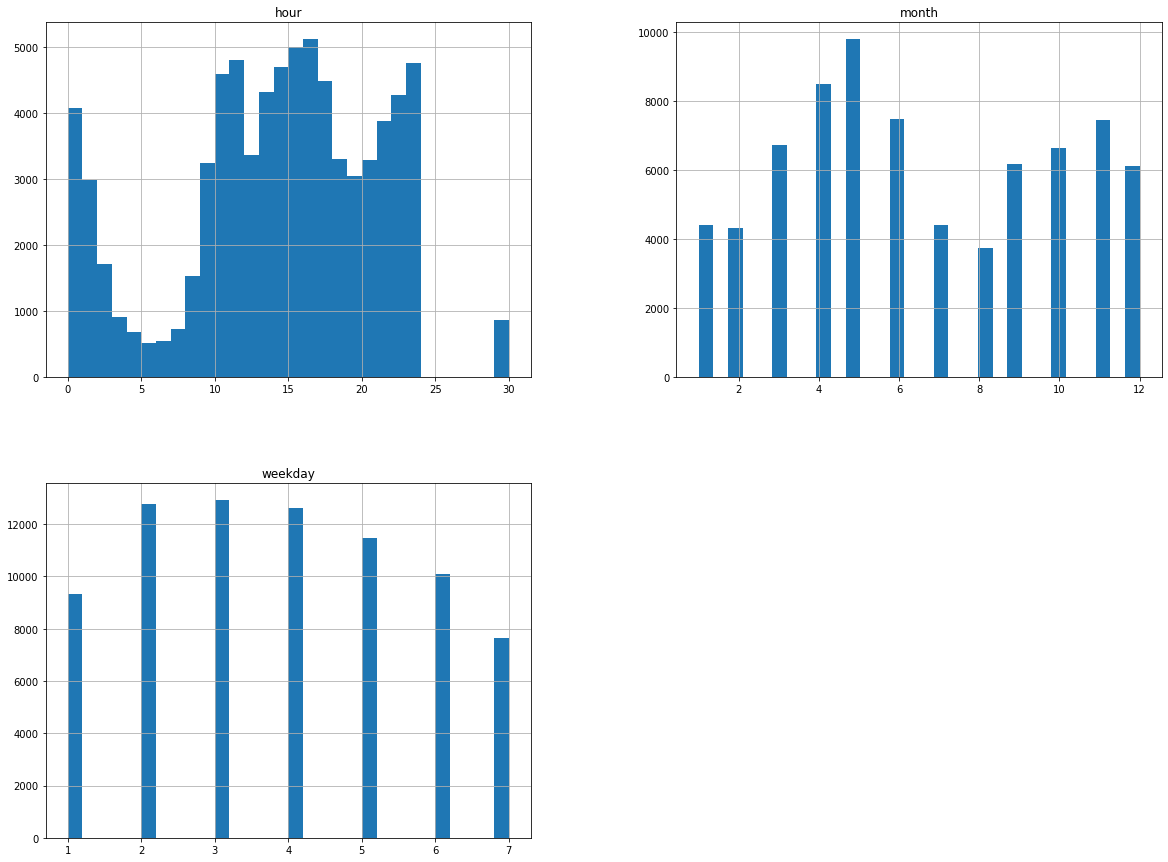

In [19]:
data01.hist(bins=30, figsize=(20,15))

In [20]:
data01.corr()

,month,weekday,hour
month,1.000000,-0.034363,-0.003802
weekday,-0.034363,1.000000,-0.055173
hour,-0.003802,-0.055173,1.000000


## 2. 데이터의 문제 수정하기

### 2.1. NULL값이 존재하는 변수 중 범주형 변수의 NULL값을 'UNKNOWN'으로 대체하고 처리 결과를 제시하세요.

In [37]:
data01.major.fillna('unknown', inplace=True)
data01

,user_id,region,college,major,social_position,month,weekday,hour,DB
0,U0002,R01,C0002,M09,S005,3.0,3,21,DB048
1,U0003,R01,C0003,M01,S001,3.0,2,12,DB048
2,U0003,R01,C0003,M01,S001,3.0,2,13,DB048
3,U0006,R01,C0001,M11,S005,3.0,2,14,DB055
4,U0005,R01,C0001,M08,S005,3.0,2,14,DB044
5,U0007,R01,C0001,M08,S005,3.0,2,14,DB044
6,U0009,R01,C0001,M06,S005,3.0,2,15,DB055
7,U0007,R01,C0001,M08,S005,3.0,2,15,DB077
8,U0008,R01,C0001,M04,S005,3.0,2,16,DB031
9,U0010,R01,C0002,M06,S001,3.0,2,16,DB030


### 2.2. NULL값이 존재하는 변수 중 수치형 변수의 NULL값은 제거하고 처리 뒤 데이터의 행과 열을 제시하세요.

In [47]:
data01.dropna(how='all')
data01

,user_id,region,college,major,social_position,month,weekday,hour,DB
0,U0002,R01,C0002,M09,S005,3.0,3,21,DB048
1,U0003,R01,C0003,M01,S001,3.0,2,12,DB048
2,U0003,R01,C0003,M01,S001,3.0,2,13,DB048
3,U0006,R01,C0001,M11,S005,3.0,2,14,DB055
4,U0005,R01,C0001,M08,S005,3.0,2,14,DB044
5,U0007,R01,C0001,M08,S005,3.0,2,14,DB044
6,U0009,R01,C0001,M06,S005,3.0,2,15,DB055
7,U0007,R01,C0001,M08,S005,3.0,2,15,DB077
8,U0008,R01,C0001,M04,S005,3.0,2,16,DB031
9,U0010,R01,C0002,M06,S001,3.0,2,16,DB030


In [48]:
data01.isnull()

,user_id,region,college,major,social_position,month,weekday,hour,DB
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False
